In [ ]:
from google.colab import files

# Paso 1: Subir los archivos desde la computadora
uploaded = files.upload()

Saving Iran Customer Churn.csv to Iran Customer Churn.csv


# **Preparación y Análisis Inicial**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

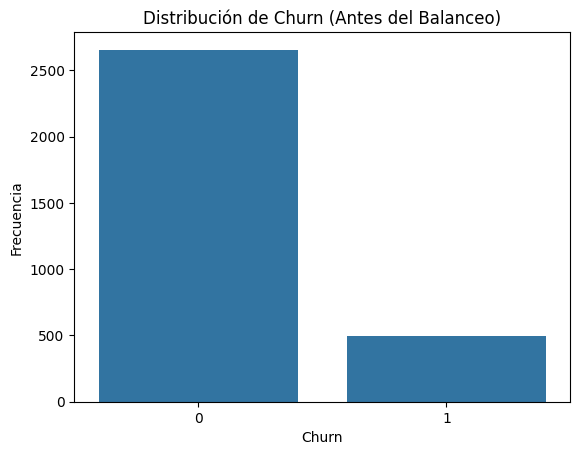

<ipython-input-40-0e1be961ab09>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='viridis')


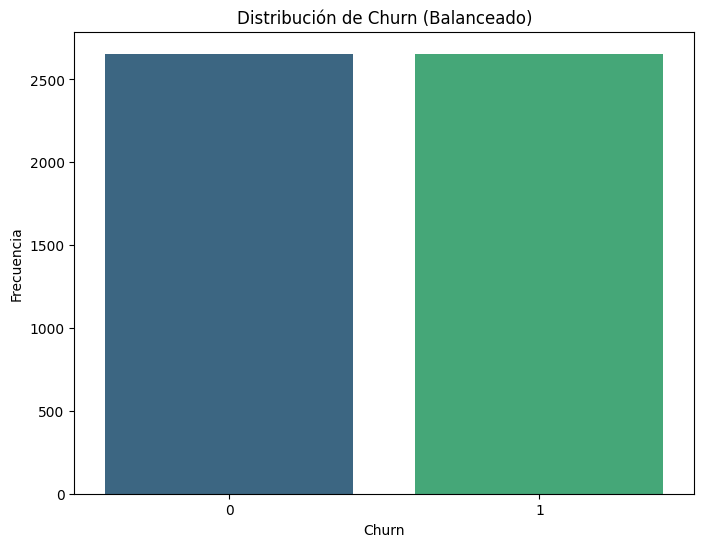

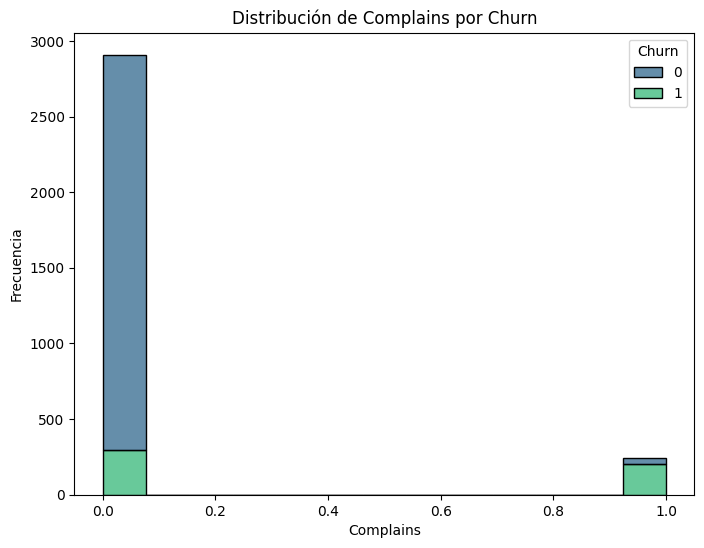

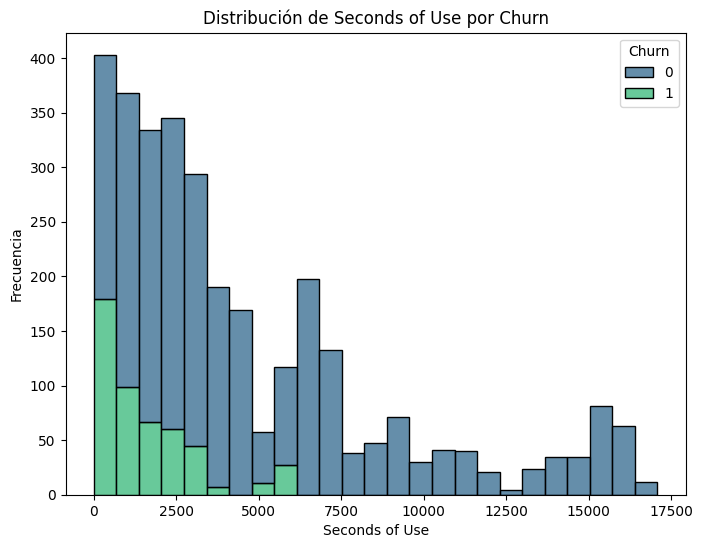

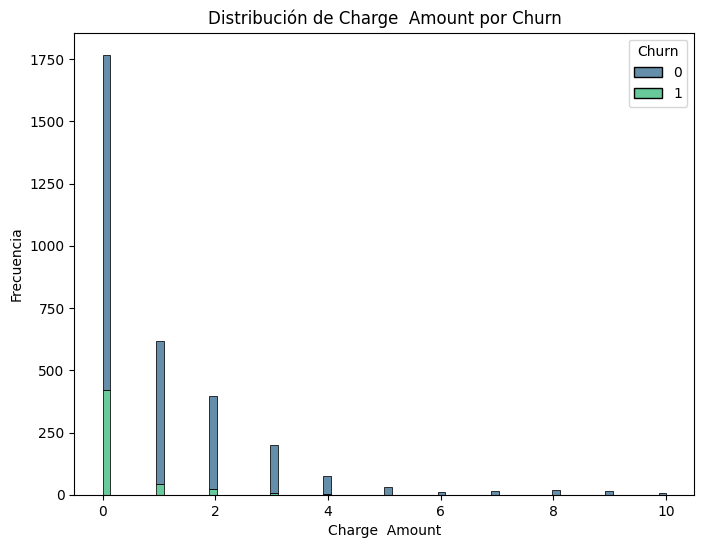

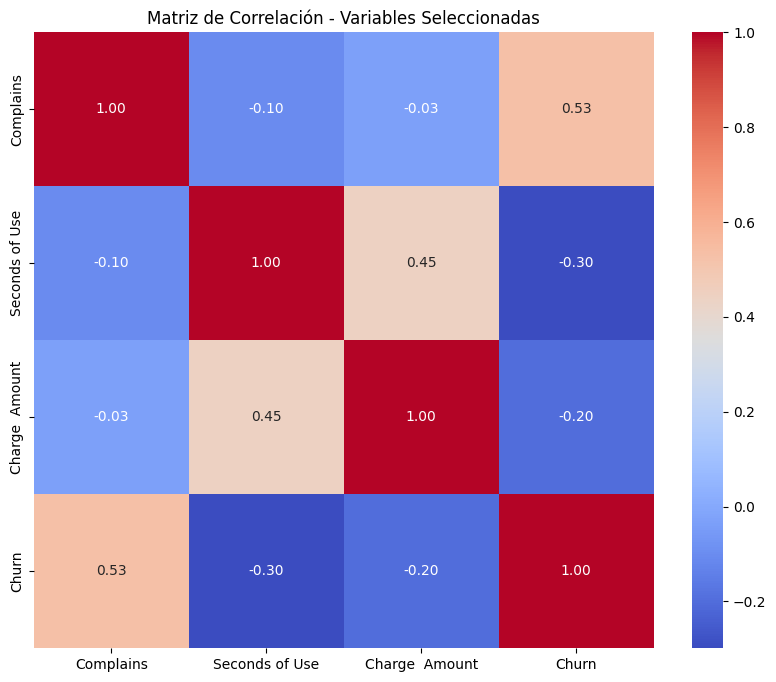

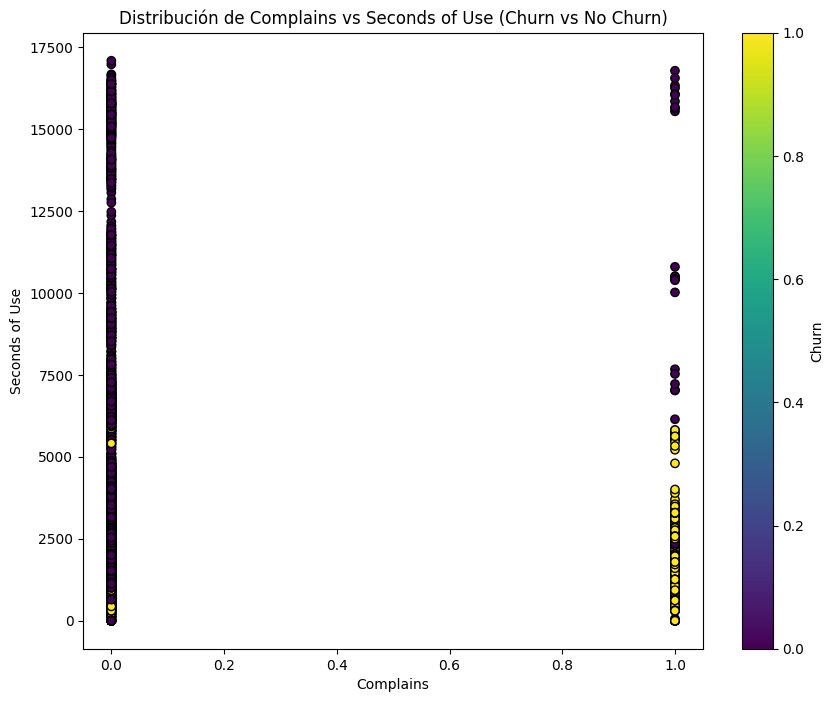

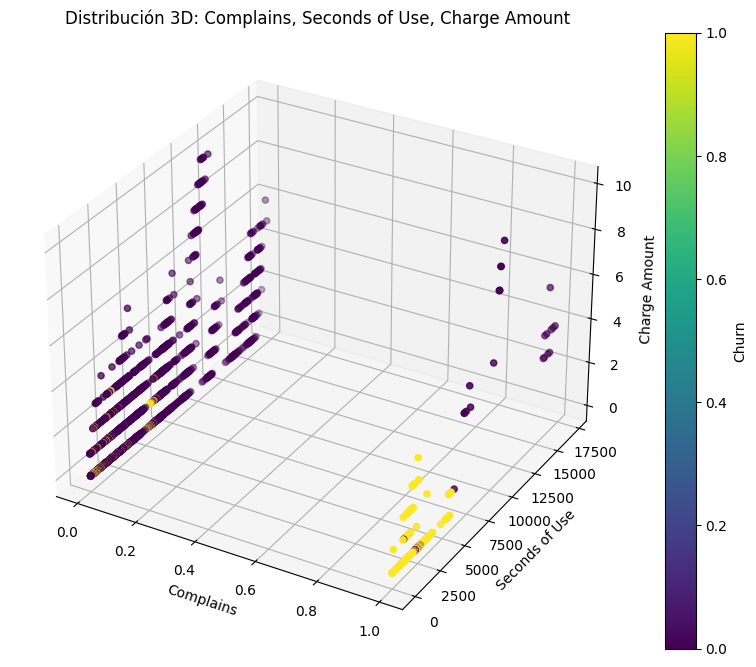

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D  # Para la visualización en 3D
import numpy as np

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('Iran Customer Churn.csv')  # Asegúrate de que el archivo tenga este nombre al subirlo

# Resumen rápido de la estructura del dataset
df.info()

# Descripción estadística de las variables numéricas
df.describe()

# Visualizar la distribución de la variable 'Churn' antes del balanceo
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn (Antes del Balanceo)')
plt.xlabel('Churn')
plt.ylabel('Frecuencia')
plt.show()

# Variables Seleccionadas para el Análisis
X = df[['Complains', 'Seconds of Use', 'Charge  Amount']]  # Variables predictoras
y = df['Churn']  # Variable a predecir

# Balanceo de los datos con SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
X_resampled, y_resampled = X_smote, y_smote

# Distribución de Churn después del balanceo
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, palette='viridis')
plt.title('Distribución de Churn (Balanceado)')
plt.xlabel('Churn')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de las tres características clave después del balanceo
variables_interes = ['Complains', 'Seconds of Use', 'Charge  Amount']

for col in variables_interes:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=X, x=col, hue=y, multiple='stack', kde=False, palette='viridis')
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Matriz de Correlación para las Variables Seleccionadas
plt.figure(figsize=(10, 8))
correlation_matrix = pd.concat([X, pd.DataFrame(y, columns=['Churn'])], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación - Variables Seleccionadas')
plt.show()

# Visualización de la geometría del dataset balanceado (2D y 3D)
# Gráfico 2D: Complains vs Seconds of Use
plt.figure(figsize=(10, 8))
plt.scatter(X['Complains'], X['Seconds of Use'], c=y, cmap='viridis', edgecolor='k', marker='o')
plt.xlabel('Complains')
plt.ylabel('Seconds of Use')
plt.title('Distribución de Complains vs Seconds of Use (Churn vs No Churn)')
plt.colorbar(label='Churn')
plt.show()

# Gráfico 3D: Complains vs Seconds of Use vs Charge Amount
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X['Complains'], X['Seconds of Use'], X['Charge  Amount'], c=y, cmap='viridis')
ax.set_xlabel('Complains')
ax.set_ylabel('Seconds of Use')
ax.set_zlabel('Charge Amount')
ax.set_title('Distribución 3D: Complains, Seconds of Use, Charge Amount')
plt.colorbar(scatter, label='Churn')
plt.show()

# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)




---


# **Red Neuronal Sin Capas Ocultas**
Este bloque se encargará de entrenar un modelo básico de red neuronal sin capas ocultas para predecir churn.

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 255.4473 - precision_19: 0.5698
Epoch 2/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9640 - precision_19: 0.6236
Epoch 3/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8586 - precision_19: 0.6664
Epoch 4/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7833 - precision_19: 0.6833
Epoch 5/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6933 - precision_19: 0.7029
Epoch 6/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6612 - precision_19: 0.7100
Epoch 7/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6496 - precision_19: 0.7061
Epoch 8/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6419 - precision_19: 0.7274
Epoch 9/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6343 - precision_19: 0.7296
Epoch 10/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6308 - precision_19: 0.7326
Epoch 11/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6323 - precision_19: 0.7325
Epoch 1

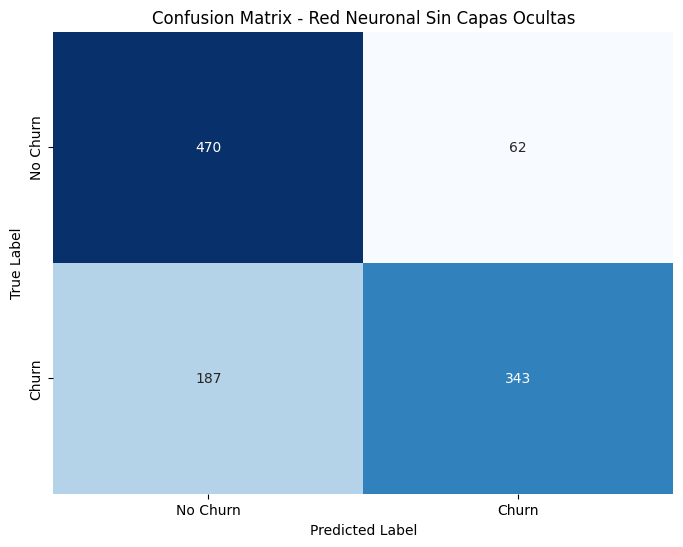

              precision    recall  f1-score   support

    No Churn       0.72      0.88      0.79       532
       Churn       0.85      0.65      0.73       530

    accuracy                           0.77      1062
   macro avg       0.78      0.77      0.76      1062
weighted avg       0.78      0.77      0.76      1062

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error (MSE) difference: 0.0054
Mean Squared Error (MSE) on training data: 0.2399
Mean Squared Error (MSE) on test data: 0.2345


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt

# Fijar la semilla para reproducibilidad
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Convertir las etiquetas de churn a formato categórico (one-hot encoding)
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Crear el modelo de red neuronal sin capas ocultas
model = Sequential()
model.add(Dense(units=2, input_shape=(X_train.shape[1],), activation='softmax'))  # 2 clases de salida: churn y no churn

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[Precision()])

# Entrenar el modelo
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=10, verbose=1)

# Evaluar el modelo en el conjunto de prueba
loss, precision = model.evaluate(X_test, y_test_encoded)
print(f'Precisión en el conjunto de prueba: {precision * 100:.2f}%')

# Predecir en el conjunto de prueba
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Red Neuronal Sin Capas Ocultas')
plt.show()

# Reporte de clasificación
report = classification_report(np.argmax(y_test_encoded, axis=1), y_pred, target_names=['No Churn', 'Churn'])
print(report)

# Mean Squared Error (MSE)
y_train_probs = model.predict(X_train)
y_train_1 = np.argmax(y_train_probs, axis=1)

mse_train = mean_squared_error(y_train, y_train_1)
mse_test = mean_squared_error(y_test, y_pred)
mse_diff = mse_train - mse_test

# Print MSE
print(f'Mean Squared Error (MSE) difference: {mse_diff:.4f}')
print(f'Mean Squared Error (MSE) on training data: {mse_train:.4f}')
print(f'Mean Squared Error (MSE) on test data: {mse_test:.4f}')




---

# **Red Neuronal con Capas Ocultas**

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


340/340 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 34.1355 - precision_20: 0.5844 - val_loss: 0.6885 - val_precision_20: 0.6929
Epoch 2/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5049 - precision_20: 0.6132 - val_loss: 4.3914 - val_precision_20: 0.5706
Epoch 3/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5113 - precision_20: 0.6565 - val_loss: 2.4521 - val_precision_20: 0.6318
Epoch 4/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8629 - precision_20: 0.6578 - val_loss: 0.5837 - val_precision_20: 0.7129
Epoch 5/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3320 - precision_20: 0.6721 - val_loss: 2.1128 - val_precision_20: 0.4976
Epoch 6/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5616 - precision_20: 0.6662 - val_loss: 0.5532 - val_precision_20: 0.7247
Epoch 7/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3962 - precision_20: 0.6865 - val_loss: 4.6659 - val_precision_20: 0.6082
Epoch 8/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

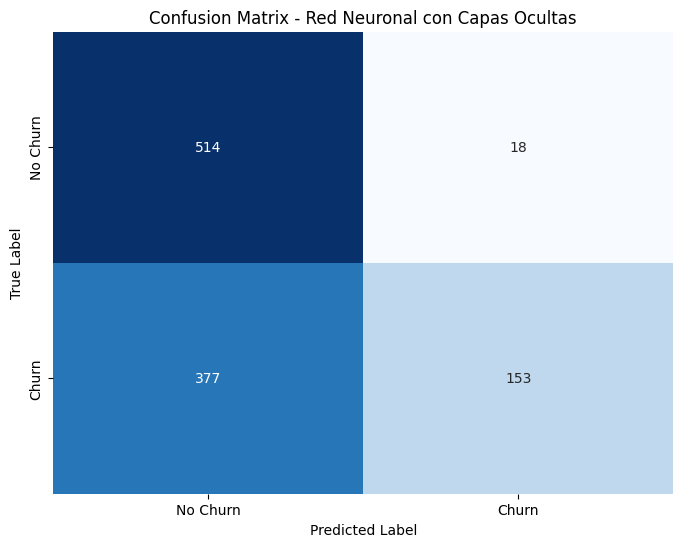

              precision    recall  f1-score   support

    No Churn       0.58      0.97      0.72       532
       Churn       0.89      0.29      0.44       530

    accuracy                           0.63      1062
   macro avg       0.74      0.63      0.58      1062
weighted avg       0.74      0.63      0.58      1062



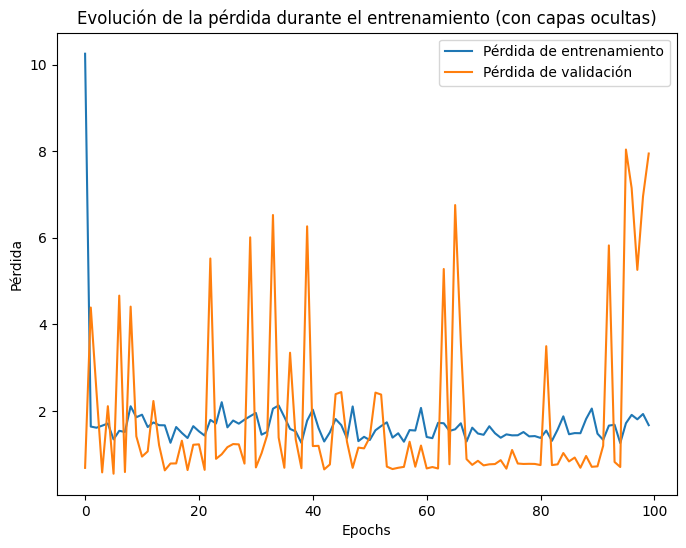

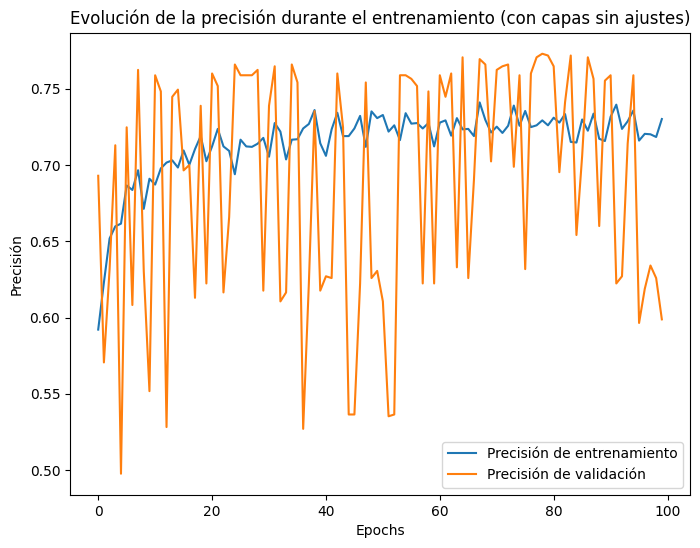

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Fijar la semilla para reproducibilidad
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Convertir las etiquetas de churn a formato categórico (one-hot encoding)
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Crear el modelo de red neuronal con capas ocultas
model_hidden = Sequential()

# Capa oculta con 8 neuronas y activación ReLU
model_hidden.add(Dense(units=8, input_shape=(X_train.shape[1],), activation='relu'))

# Capa de salida con 2 neuronas (para churn y no churn) y activación softmax
model_hidden.add(Dense(units=2, activation='softmax'))

# Compilar el modelo
model_hidden.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[Precision()])

# Entrenar el modelo con un conjunto de validación (20% de los datos de entrenamiento se utilizarán para validación)
history_hidden = model_hidden.fit(X_train, y_train_encoded, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss_hidden, precision_hidden = model_hidden.evaluate(X_test, y_test_encoded)
print(f'Precisión en el conjunto de prueba (con capas ocultas): {precision_hidden * 100:.2f}%')

# Predecir en el conjunto de prueba
y_pred_probs_hidden = model_hidden.predict(X_test)
y_pred_hidden = np.argmax(y_pred_probs_hidden, axis=1)

# Calcular la matriz de confusión
cm_hidden = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_hidden)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_hidden, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Red Neuronal con Capas Ocultas')
plt.show()

# Reporte de clasificación
report_hidden = classification_report(np.argmax(y_test_encoded, axis=1), y_pred_hidden, target_names=['No Churn', 'Churn'])
print(report_hidden)

# Graficar la evolución de la pérdida durante el entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(history_hidden.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_hidden.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida durante el entrenamiento (con capas ocultas)')
plt.legend()
plt.show()

# Encontrar la presición y su validación dinámica
precision_key_h = [key for key in history_hidden.history.keys() if "precision" in key and "val" not in key][0]
val_precision_key_h = [key for key in history_hidden.history.keys() if "val_precision" in key][0]

# Graficar la evolución de la precisión durante el entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(history_hidden.history[precision_key_h], label='Precisión de entrenamiento')
plt.plot(history_hidden.history[val_precision_key_h], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión durante el entrenamiento (con capas sin ajustes)')
plt.legend()
plt.show()




---


# **Red Neuronal con Capas Ocultas y Ajustes**

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 232.9755 - precision_21: 0.5596 - val_loss: 1.8556 - val_precision_21: 0.5718
Epoch 2/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 62.8068 - precision_21: 0.5519 - val_loss: 6.3672 - val_precision_21: 0.5647
Epoch 3/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24.9486 - precision_21: 0.6114 - val_loss: 4.2013 - val_precision_21: 0.5682
Epoch 4/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.6931 - precision_21: 0.5840 - val_loss: 2.5574 - val_precision_21: 0.5953
Epoch 5/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0909 - precision_21: 0.6188 - val_loss: 0.9516 - val_precision_21: 0.4965
Epoch 6/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7792 - precision_21: 0.6605 - val_loss: 1.0189 - val_precision_21: 0.4965
Epoch 7/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8355 - precision_21: 0.6601 - val_loss: 1.1487 - val_precision_21: 0.6553
Epoch 8/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 

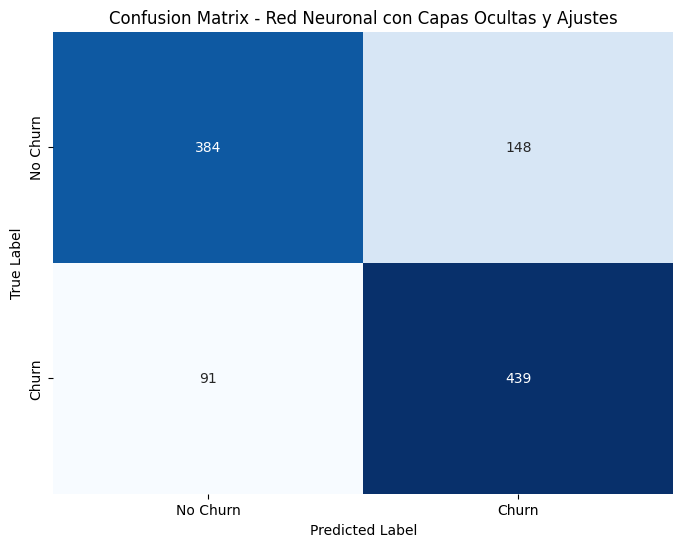

              precision    recall  f1-score   support

    No Churn       0.81      0.72      0.76       532
       Churn       0.75      0.83      0.79       530

    accuracy                           0.77      1062
   macro avg       0.78      0.78      0.77      1062
weighted avg       0.78      0.77      0.77      1062



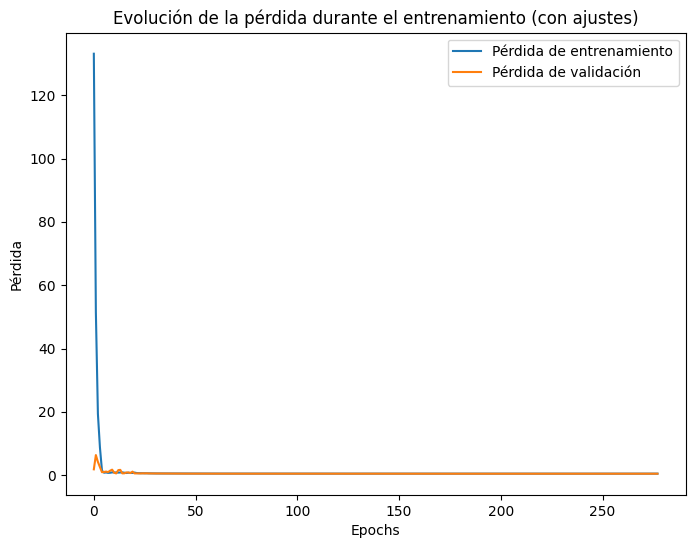

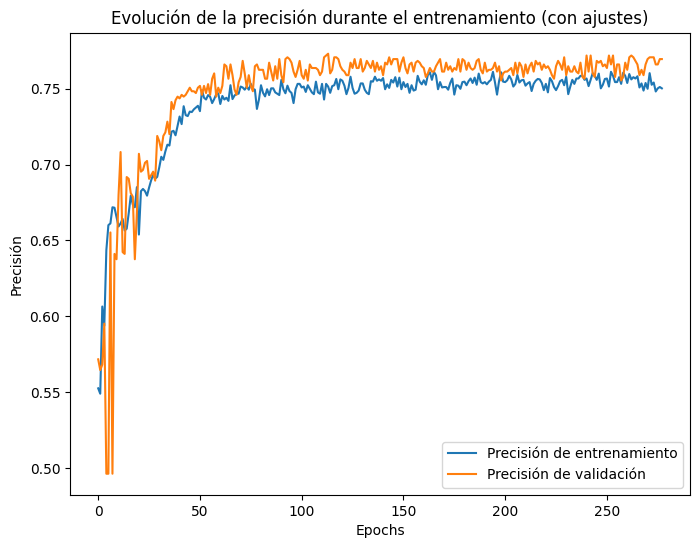

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error (MSE) difference: 0.0132
Mean Squared Error (MSE) on training data: 0.2382
Mean Squared Error (MSE) on test data: 0.2250


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Fijar la semilla para reproducibilidad
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Convertir las etiquetas de churn a formato categórico (one-hot encoding)
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Crear el modelo de red neuronal con capas ocultas y ajustes
model_adjusted = Sequential()

# Capa oculta con 8 neuronas, activación ReLU y Dropout para prevenir sobreajuste
model_adjusted.add(Dense(units=8, input_shape=(X_train.shape[1],), activation='relu'))
model_adjusted.add(Dropout(0.1))  # El 10% de las neuronas se desactivan aleatoriamente durante el entrenamiento

# Capa de salida con 2 neuronas (para churn y no churn) y activación softmax
model_adjusted.add(Dense(units=2, activation='softmax'))

# Compilar el modelo
model_adjusted.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[Precision()])

# Implementar EarlyStopping para detener el entrenamiento si no hay mejora después de 10 épocas
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Entrenar el modelo con Dropout y EarlyStopping, utilizando validación
history_adjusted = model_adjusted.fit(
    X_train, y_train_encoded,
    epochs=1000,  # Entrenamos hasta 1000 épocas, pero EarlyStopping puede detener el entrenamiento antes
    batch_size=10,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo en el conjunto de prueba
loss_adjusted, precision_adjusted = model_adjusted.evaluate(X_test, y_test_encoded)
print(f'Precisión en el conjunto de prueba (con capas y ajustado): {precision_adjusted * 100:.2f}%')

# Predecir en el conjunto de prueba
y_pred_probs_adjusted = model_adjusted.predict(X_test)
y_pred_adjusted = np.argmax(y_pred_probs_adjusted, axis=1)

# Calcular la matriz de confusión
cm_adjusted = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_adjusted)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adjusted, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Red Neuronal con Capas Ocultas y Ajustes')
plt.show()

# Reporte de clasificación
report_adjusted = classification_report(np.argmax(y_test_encoded, axis=1), y_pred_adjusted, target_names=['No Churn', 'Churn'])
print(report_adjusted)

# Graficar la evolución de la pérdida durante el entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(history_adjusted.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_adjusted.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida durante el entrenamiento (con ajustes)')
plt.legend()
plt.show()

# Encontrar la presición y su validación dinámica
precision_key = [key for key in history_adjusted.history.keys() if "precision" in key and "val" not in key][0]
val_precision_key = [key for key in history_adjusted.history.keys() if "val_precision" in key][0]

# Graficar la evolución de la precisión durante el entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(history_adjusted.history[precision_key], label='Precisión de entrenamiento')
plt.plot(history_adjusted.history[val_precision_key], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión durante el entrenamiento (con ajustes)')
plt.legend()
plt.show()

# Mean Squared Error (MSE)
y_train_pred_probs = model_adjusted.predict(X_train)
y_train_adjusted = np.argmax(y_train_pred_probs, axis=1)

mse_train = mean_squared_error(y_train, y_train_adjusted)
mse_test = mean_squared_error(y_test, y_pred_adjusted)
mse_diff = mse_train - mse_test

# Print MSE
print(f'Mean Squared Error (MSE) difference: {mse_diff:.4f}')
print(f'Mean Squared Error (MSE) on training data: {mse_train:.4f}')
print(f'Mean Squared Error (MSE) on test data: {mse_test:.4f}')



# Red con capa, ajustes (recall)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 250.2499 - recall_3: 0.5778 - val_loss: 0.9652 - val_recall_3: 0.6341
Epoch 2/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 103.8859 - recall_3: 0.5854 - val_loss: 0.8030 - val_recall_3: 0.4965
Epoch 3/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 78.9713 - recall_3: 0.5954 - val_loss: 0.9796 - val_recall_3: 0.6847
Epoch 4/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 40.7289 - recall_3: 0.6452 - val_loss: 0.7672 - val_recall_3: 0.6976
Epoch 5/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.6386 - recall_3: 0.6313 - val_loss: 1.6691 - val_recall_3: 0.6494
Epoch 6/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.5482 - recall_3: 0.6614 - val_loss: 0.8102 - val_recall_3: 0.6718
Epoch 7/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6973 - recall_3: 0.6561 - val_loss: 0.6608 - val_recall_3: 0.6859
Epoch 8/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6697 - recall_3: 0.6766 - val_lo

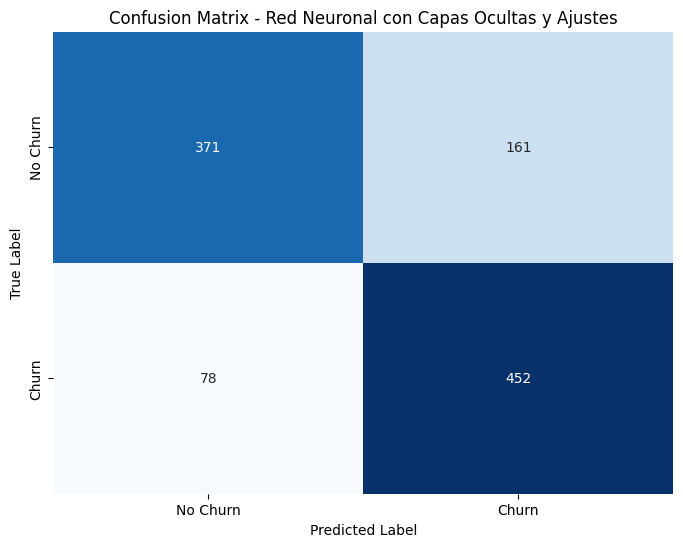

              precision    recall  f1-score   support

    No Churn       0.83      0.70      0.76       532
       Churn       0.74      0.85      0.79       530

    accuracy                           0.77      1062
   macro avg       0.78      0.78      0.77      1062
weighted avg       0.78      0.77      0.77      1062



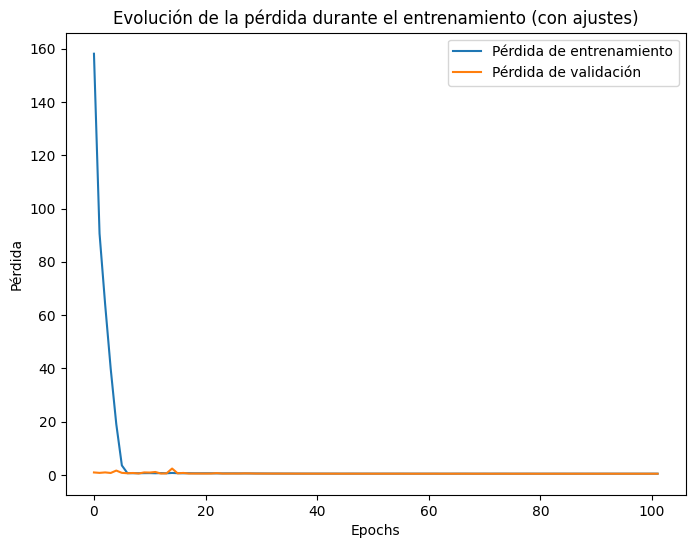

dict_keys(['loss', 'recall_3', 'val_loss', 'val_recall_3'])


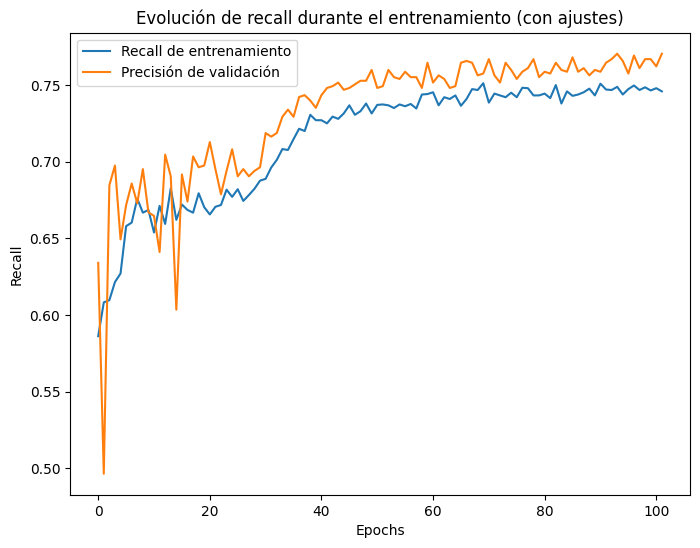

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error (MSE) difference: 0.0122
Mean Squared Error (MSE) on training data: 0.2373
Mean Squared Error (MSE) on test data: 0.2250


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Recall
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Fijar la semilla para reproducibilidad
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Convertir las etiquetas de churn a formato categórico (one-hot encoding)
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Crear el modelo de red neuronal con capas ocultas y ajustes
model_adjusted = Sequential()

# Capa oculta con 8 neuronas, activación ReLU y Dropout para prevenir sobreajuste
model_adjusted.add(Dense(units=8, input_shape=(X_train.shape[1],), activation='relu'))
model_adjusted.add(Dropout(0.1))  # El 10% de las neuronas se desactivan aleatoriamente durante el entrenamiento

# Capa de salida con 2 neuronas (para churn y no churn) y activación softmax
model_adjusted.add(Dense(units=2, activation='softmax'))

# Compilar el modelo
model_adjusted.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[Recall()])

# Implementar EarlyStopping para detener el entrenamiento si no hay mejora después de 10 épocas
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Entrenar el modelo con Dropout y EarlyStopping, utilizando validación
history_adjusted = model_adjusted.fit(
    X_train, y_train_encoded,
    epochs=1000,  # Entrenamos hasta 1000 épocas, pero EarlyStopping puede detener el entrenamiento antes
    batch_size=10,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo en el conjunto de prueba
loss_adjusted, recall_adjusted = model_adjusted.evaluate(X_test, y_test_encoded)
print(f'Recall en el conjunto de prueba (con capas y ajustado): {recall_adjusted * 100:.2f}%')

# Predecir en el conjunto de prueba
y_pred_probs_adjusted = model_adjusted.predict(X_test)
y_pred_adjusted = np.argmax(y_pred_probs_adjusted, axis=1)

# Calcular la matriz de confusión
cm_adjusted = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_adjusted)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adjusted, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Red Neuronal con Capas Ocultas y Ajustes')
plt.show()

# Reporte de clasificación
report_adjusted = classification_report(np.argmax(y_test_encoded, axis=1), y_pred_adjusted, target_names=['No Churn', 'Churn'])
print(report_adjusted)

# Graficar la evolución de la pérdida durante el entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(history_adjusted.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_adjusted.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida durante el entrenamiento (con ajustes)')
plt.legend()
plt.show()

print(history_adjusted.history.keys())

# Encontrar recall y su validación dinámica
recall_key = [key for key in history_adjusted.history.keys() if "recall" in key and "val" not in key][0]
val_recall_key = [key for key in history_adjusted.history.keys() if "val_recall" in key][0]

# Graficar la evolución de la precisión durante el entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(history_adjusted.history[recall_key], label='Recall de entrenamiento')
plt.plot(history_adjusted.history[val_recall_key], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Evolución de recall durante el entrenamiento (con ajustes)')
plt.legend()
plt.show()

# Mean Squared Error (MSE)
y_train_pred_probs = model_adjusted.predict(X_train)
y_train_adjusted = np.argmax(y_train_pred_probs, axis=1)

mse_train = mean_squared_error(y_train, y_train_adjusted)
mse_test = mean_squared_error(y_test, y_pred_adjusted)
mse_diff = mse_train - mse_test

# Print MSE
print(f'Mean Squared Error (MSE) difference: {mse_diff:.4f}')
print(f'Mean Squared Error (MSE) on training data: {mse_train:.4f}')
print(f'Mean Squared Error (MSE) on test data: {mse_test:.4f}')

# Redes con 2 capas y ajustes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.7592 - precision_17: 0.5148 - val_loss: 0.7186 - val_precision_17: 0.4965
Epoch 2/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7089 - precision_17: 0.5528 - val_loss: 0.6921 - val_precision_17: 0.5553
Epoch 3/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6844 - precision_17: 0.5753 - val_loss: 0.6816 - val_precision_17: 0.5553
Epoch 4/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6717 - precision_17: 0.5765 - val_loss: 0.6782 - val_precision_17: 0.5553
Epoch 5/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6691 - precision_17: 0.5751 - val_loss: 0.6769 - val_precision_17: 0.5565
Epoch 6/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6698 - precision_17: 0.5748 - val_loss: 0.6760 - val_precision_17: 0.5588
Epoch 7/1000
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6710 - precision_17: 0.5760 - val_loss: 0.6749 - val_precision_17: 0.5624
Epoch 8/1000
340/340 ━━━━━━━━━━━━━

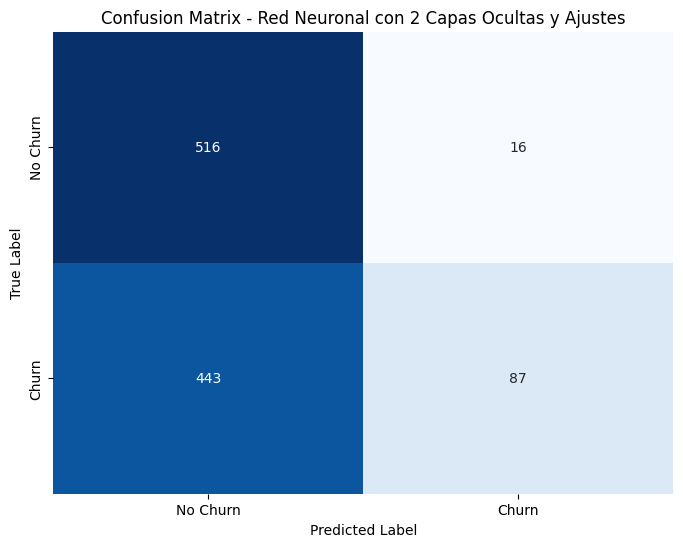

              precision    recall  f1-score   support

    No Churn       0.54      0.97      0.69       532
       Churn       0.84      0.16      0.27       530

    accuracy                           0.57      1062
   macro avg       0.69      0.57      0.48      1062
weighted avg       0.69      0.57      0.48      1062



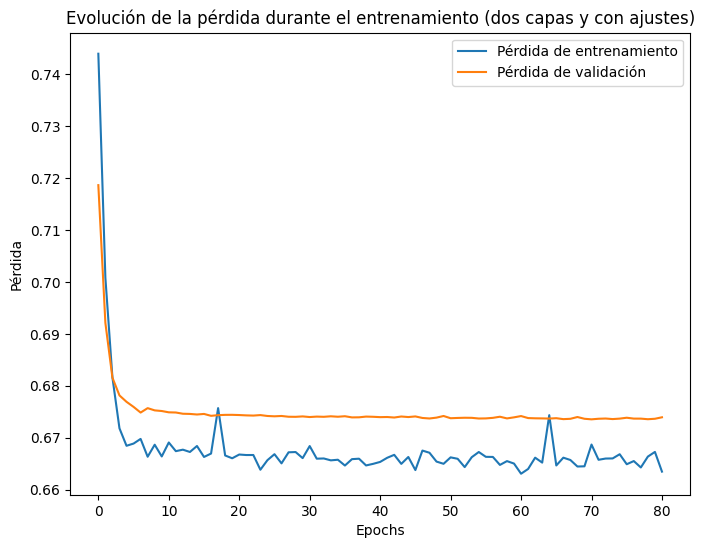

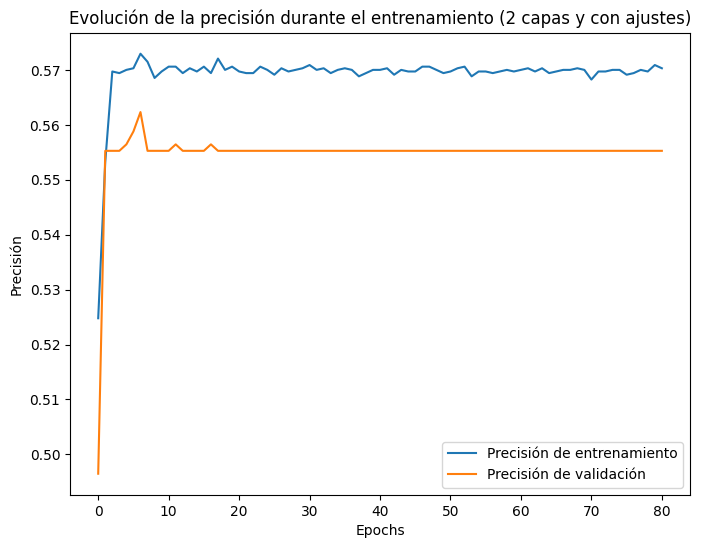

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error (MSE) difference: 0.0002
Mean Squared Error (MSE) on training data: 0.4324
Mean Squared Error (MSE) on test data: 0.4322


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Fijar la semilla para reproducibilidad
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Convertir las etiquetas de churn a formato categórico (one-hot encoding)
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Crear el modelo de red neuronal con capas ocultas y ajustes
model_big = Sequential()

# Capas ocultas con 8 neuronas y otra con 4, activación ReLU y Dropout para prevenir sobreajuste
model_big.add(Dense(units=4, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.01)))
model_big.add(Dropout(0.2))  # El 20% de las neuronas se desactivan aleatoriamente durante el entrenamiento
model_big.add(Dense(units=4, activation='relu', kernel_regularizer=l2(0.01)))
model_big.add(Dropout(0.1)) # El 10% de las neuronas se desactivan aleatoriamente durante el entrenamiento

# Capa de salida con 2 neuronas (para churn y no churn) y activación softmax
model_big.add(Dense(units=2, activation='softmax'))

# Compilar el modelo
model_big.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[Precision()])

# Implementar EarlyStopping para detener el entrenamiento si no hay mejora después de 10 épocas
early_stopping_big = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo con Dropout y EarlyStopping, utilizando validación
history_big = model_big.fit(
    X_train, y_train_encoded,
    epochs=1000,  # Entrenamos hasta 1000 épocas, pero EarlyStopping puede detener el entrenamiento antes
    batch_size=10,
    validation_split=0.2,
    callbacks=[early_stopping_big],
    verbose=1
)

# Evaluar el modelo en el conjunto de prueba
loss_big, precision_big = model_big.evaluate(X_test, y_test_encoded)
print(f'Precisión en el conjunto de prueba (con capas y ajustado): {precision_big * 100:.2f}%')

# Predecir en el conjunto de prueba
y_pred_probs_big = model_big.predict(X_test)
y_pred_big = np.argmax(y_pred_probs_big, axis=1)

# Calcular la matriz de confusión
cm_big = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_big)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_big, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Red Neuronal con 2 Capas Ocultas y Ajustes')
plt.show()

# Reporte de clasificación
report_big = classification_report(np.argmax(y_test_encoded, axis=1), y_pred_big, target_names=['No Churn', 'Churn'])
print(report_big)

# Graficar la evolución de la pérdida durante el entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(history_big.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_big.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida durante el entrenamiento (dos capas y con ajustes)')
plt.legend()
plt.show()

# Encontrar la presición y su validación dinámica
precision_key_big = [key for key in history_big.history.keys() if "precision" in key and "val" not in key][0]
val_precision_key_big = [key for key in history_big.history.keys() if "val_precision" in key][0]

# Graficar la evolución de la precisión durante el entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(history_big.history[precision_key_big], label='Precisión de entrenamiento')
plt.plot(history_big.history[val_precision_key_big], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión durante el entrenamiento (2 capas y con ajustes)')
plt.legend()
plt.show()

# Mean Squared Error (MSE)
y_train_pred_probs_big = model_big.predict(X_train)
y_train_big = np.argmax(y_train_pred_probs_big, axis=1)

mse_train = mean_squared_error(y_train, y_train_big)
mse_test = mean_squared_error(y_test, y_pred_big)
mse_diff = mse_train - mse_test

# Print MSE
print(f'Mean Squared Error (MSE) difference: {mse_diff:.4f}')
print(f'Mean Squared Error (MSE) on training data: {mse_train:.4f}')
print(f'Mean Squared Error (MSE) on test data: {mse_test:.4f}')


# Red con capa oculta y ajustes no categórica

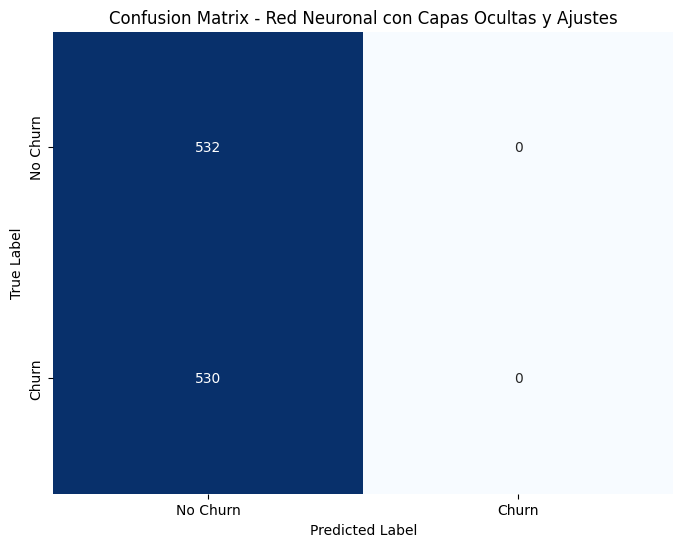

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Fijar la semilla para reproducibilidad
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Crear el modelo de red neuronal con capas ocultas y ajustes
model_binary = Sequential()

# Capa oculta con 8 neuronas, activación ReLU y Dropout para prevenir sobreajuste
model_binary.add(Dense(units=8, input_shape=(X_train.shape[1],), activation='relu'))
model_binary.add(Dropout(0.1))  # El 10% de las neuronas se desactivan aleatoriamente durante el entrenamiento

# Capa de salida con 2 neuronas (para churn y no churn) y activación softmax
model_binary.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
model_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Precision()])

# Implementar EarlyStopping para detener el entrenamiento si no hay mejora después de 10 épocas
early_stopping_binary = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Entrenar el modelo con Dropout y EarlyStopping, utilizando validación
history_binary = model_binary.fit(
    X_train, y_train,
    epochs=1000,  # Entrenamos hasta 1000 épocas, pero EarlyStopping puede detener el entrenamiento antes
    batch_size=10,
    validation_split=0.2,
    callbacks=[early_stopping_binary],
    verbose=1
)

# Evaluar el modelo en el conjunto de prueba
loss_binary, precision_binary = model_binary.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba (con capas y ajustado): {precision_binary * 100:.2f}%')

# Predecir en el conjunto de prueba
y_pred_probs_binary = model_binary.predict(X_test)
y_pred_binary = np.argmax(y_pred_probs_binary, axis=1)

# Calcular la matriz de confusión
cm_binary = confusion_matrix(y_test, y_pred_binary)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Red Neuronal con Capas Ocultas y Ajustes')
plt.show()

# Reporte de clasificación
report_binary = classification_report(y_test, y_pred_binary, target_names=['No Churn', 'Churn'])
print(report_binary)

# Graficar la evolución de la pérdida durante el entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(history_binary.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_binary.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida durante el entrenamiento (con ajustes)')
plt.legend()
plt.show()

# Encontrar la presición y su validación dinámica
precision_key_bin = [key for key in history_binary.history.keys() if "precision" in key and "val" not in key][0]
val_precision_key_bin = [key for key in history_binary.history.keys() if "val_precision" in key][0]

# Graficar la evolución de la precisión durante el entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(history_binary.history[precision_key_bin], label='Precisión de entrenamiento')
plt.plot(history_binary.history[val_precision_key_bin], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión durante el entrenamiento (con ajustes)')
plt.legend()
plt.show()

# Mean Squared Error (MSE)
y_train_pred_probs_bin = model_binary.predict(X_train)
y_train_binary = np.argmax(y_train_pred_probs_bin, axis=1)

mse_train = mean_squared_error(y_train, y_train_binary)
mse_test = mean_squared_error(y_test, y_pred_binary)
mse_diff = mse_train - mse_test

# Print MSE
print(f'Mean Squared Error (MSE) difference: {mse_diff:.4f}')
print(f'Mean Squared Error (MSE) on training data: {mse_train:.4f}')
print(f'Mean Squared Error (MSE) on test data: {mse_test:.4f}')